# Lab 3. graph-tool and Stochastic Block Models

In [1]:
import graph_tool.all as gt
import matplotlib.pyplot as plt

In [2]:
g = gt.collection.data["football"]
print(g)

<Graph object, undirected, with 115 vertices and 613 edges, 4 internal vertex properties, 2 internal graph properties, at 0x7f92e8b54af0>


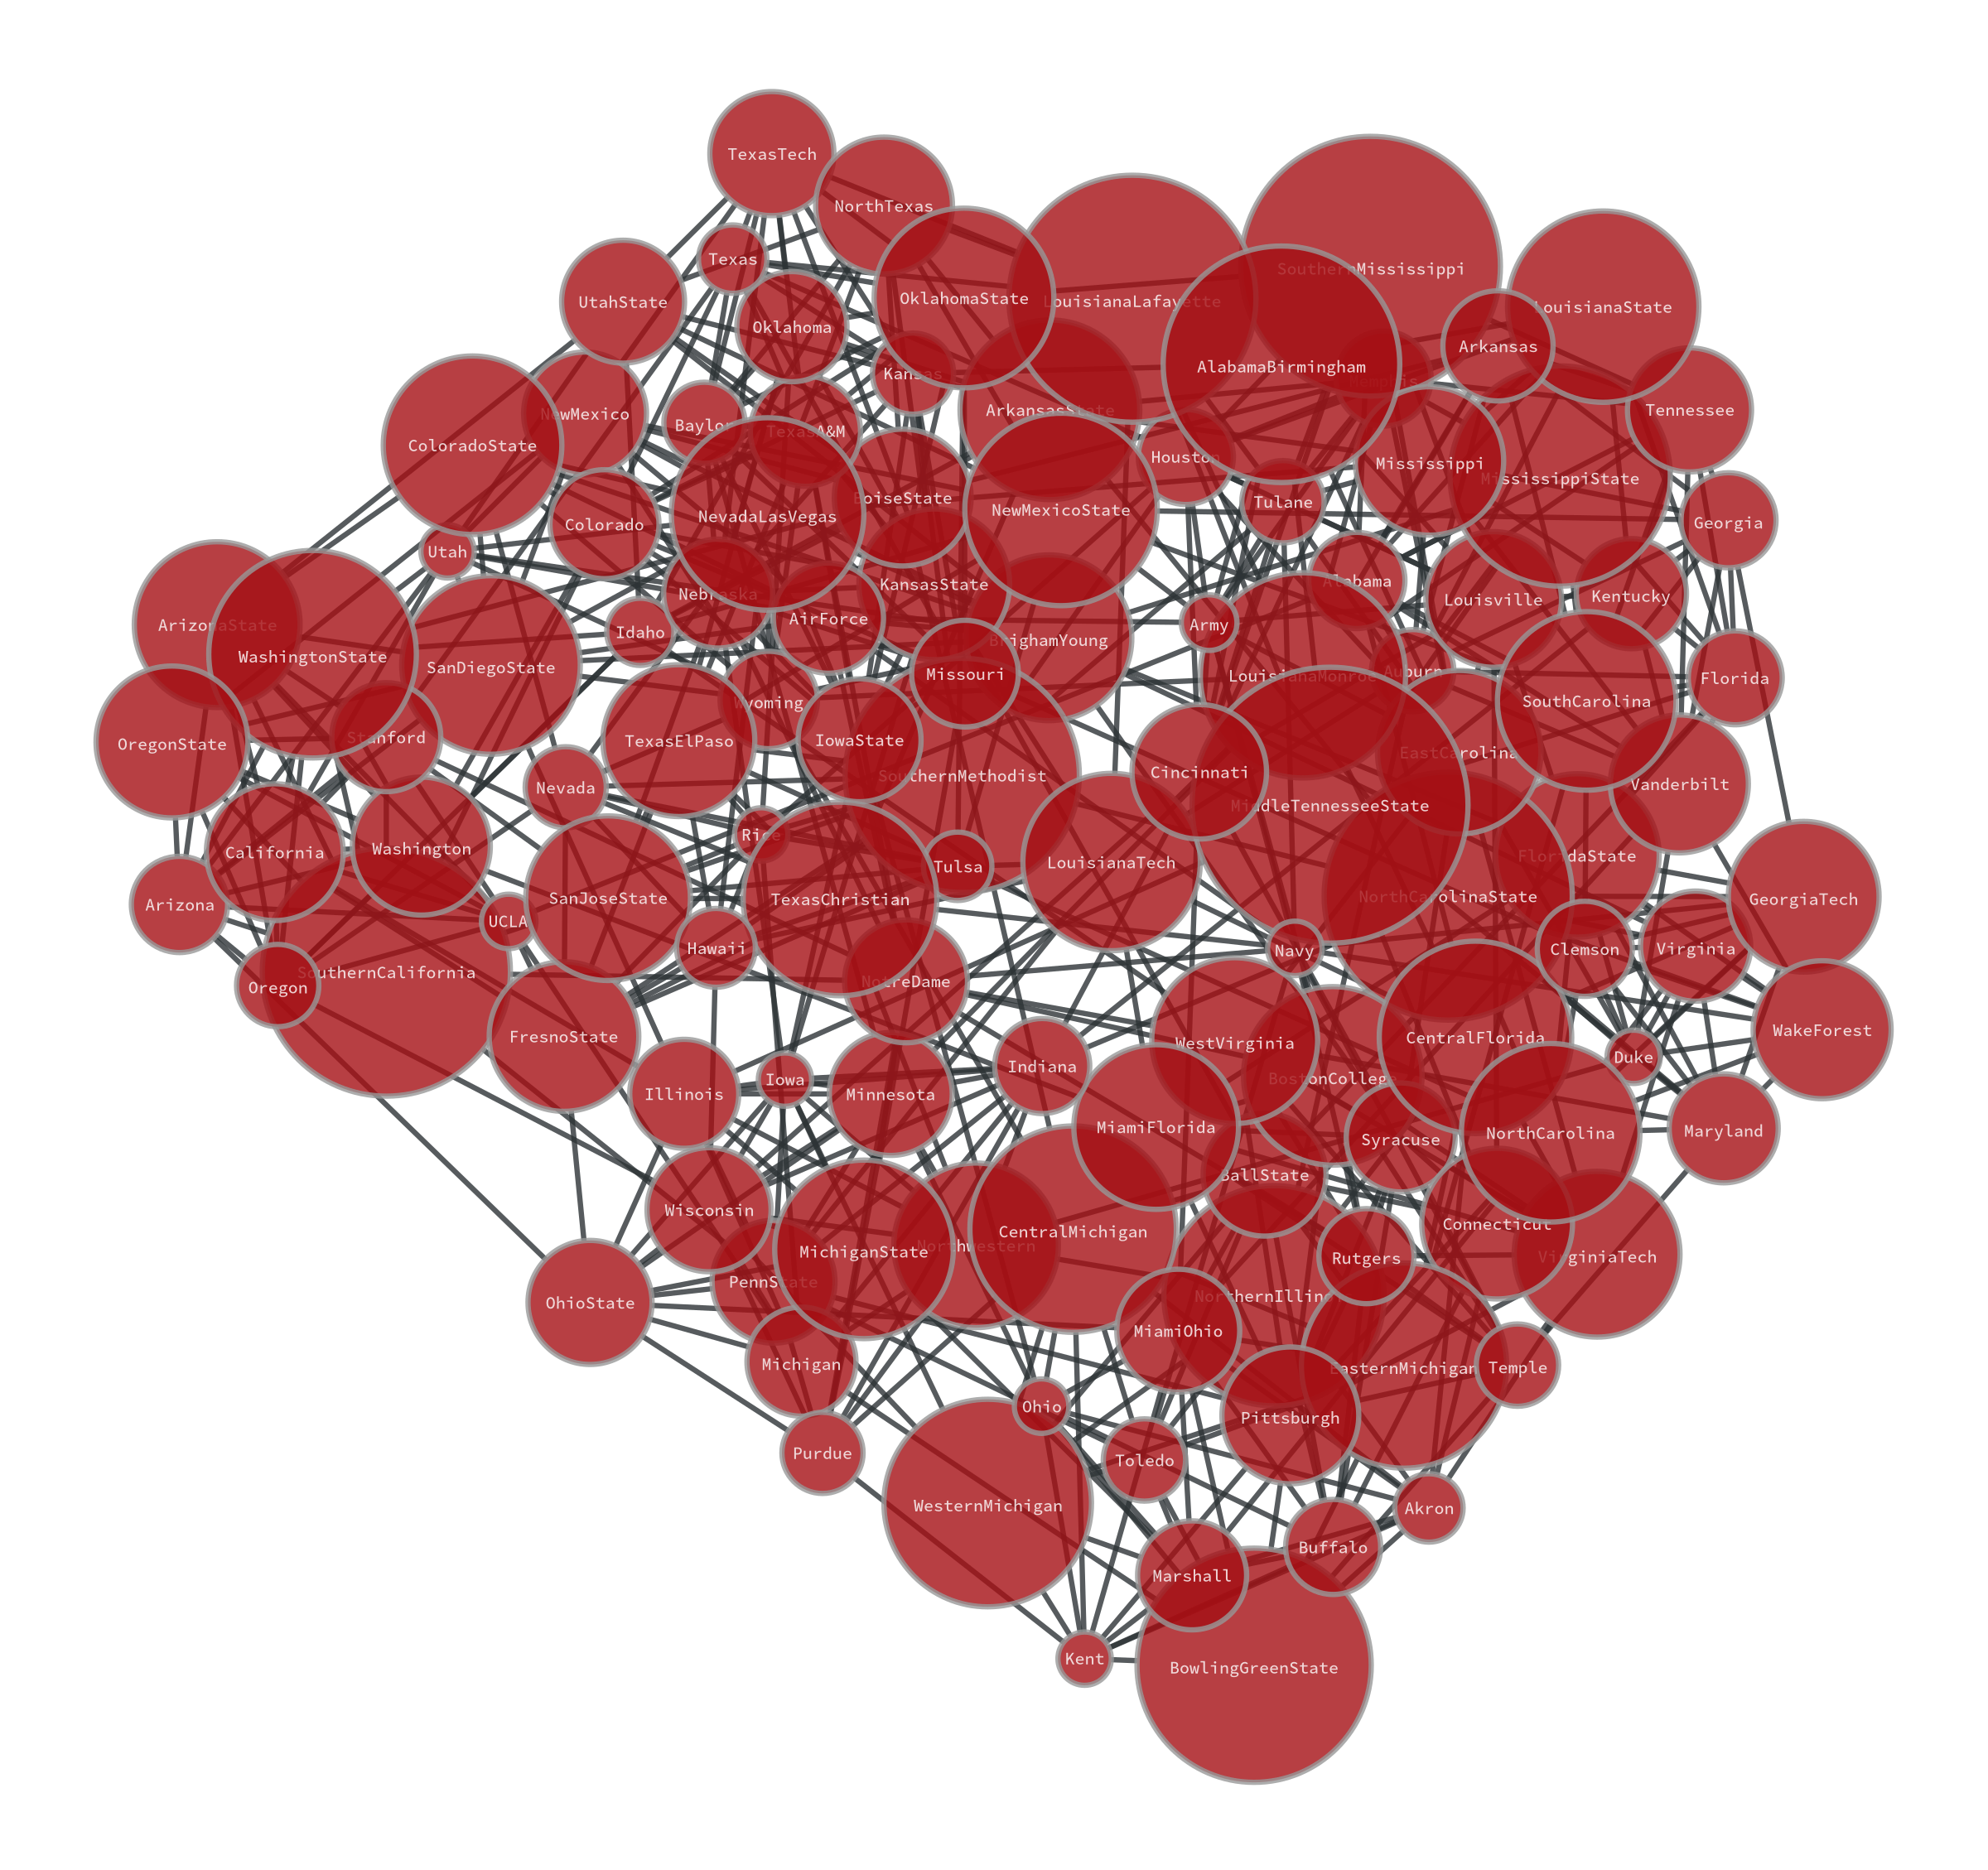

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f92e8b54af0, at 0x7f92e89e6be0>

In [3]:
gt.graph_draw(g, vertex_text=g.vp.label, vertex_font_size=10,output_size=(1200, 1200))

In [4]:
state = gt.minimize_blockmodel_dl(g)
print(state)

<BlockState object with 11 blocks (11 nonempty), degree-corrected, for graph <Graph object, undirected, with 115 vertices and 613 edges, 4 internal vertex properties, 2 internal graph properties, at 0x7f92e8b54af0>, at 0x7f92e8a04700>


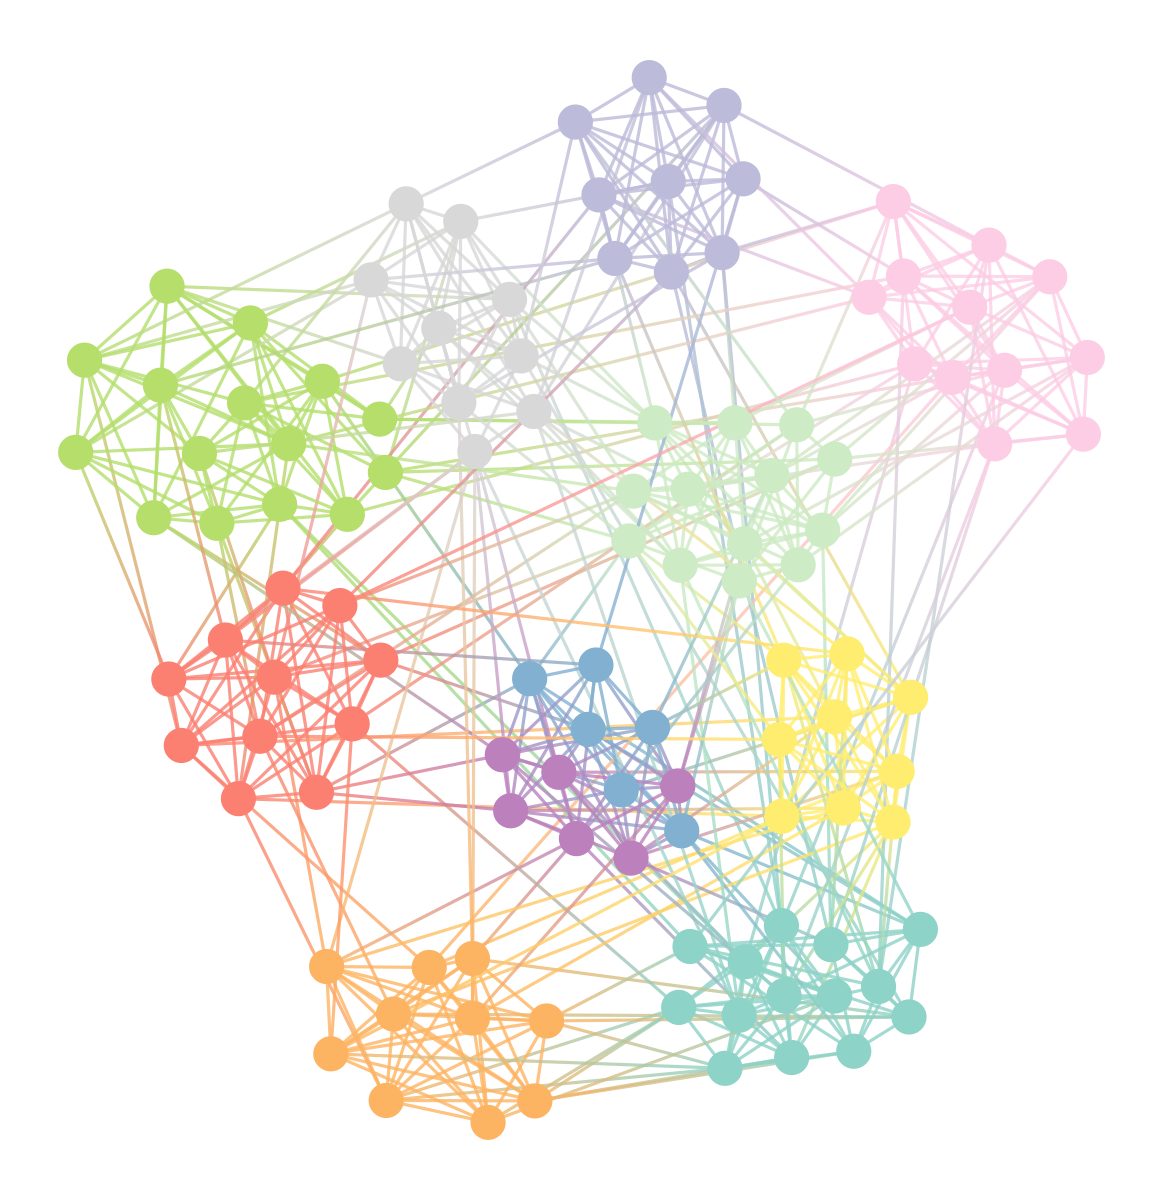

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f92e8b54af0, at 0x7f92e8a04070>

In [5]:
state.draw(pos=g.vp.pos)

### Q1: Compared the block model plot to the original network plot in step c, how are they different? What’s the information you can get from the block model plot?

Comparing to the original plot, the block model plot emphasized the clusters within the network; thus, it provides more information regarding communities formed by different sets of similar nodes. 

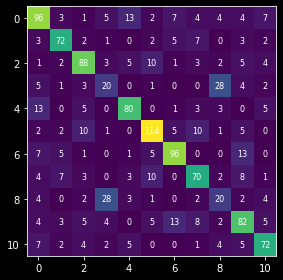

In [6]:
e = state.get_matrix().todense()
fig, ax = plt.subplots()
im=ax.imshow(e)
n=state.get_B()
for i in range(n):
    for j in range(n):
        text = ax.text(j, i, int(e[i, j]),ha="center", va="center", color="w", size="8")
fig.tight_layout()

### Q2: What information can you get from this heat map? Are there any assortative blocks? Any disassortative blocks? Is the result consistent with the block plot in step e?

According to the heat map, most high values reside on the diagonal line, which means the network consists of several assortative blocks and almost no disassortative block. In some degrees, the result demonstrates a high level of consistency with the block plot. 

# Assignment

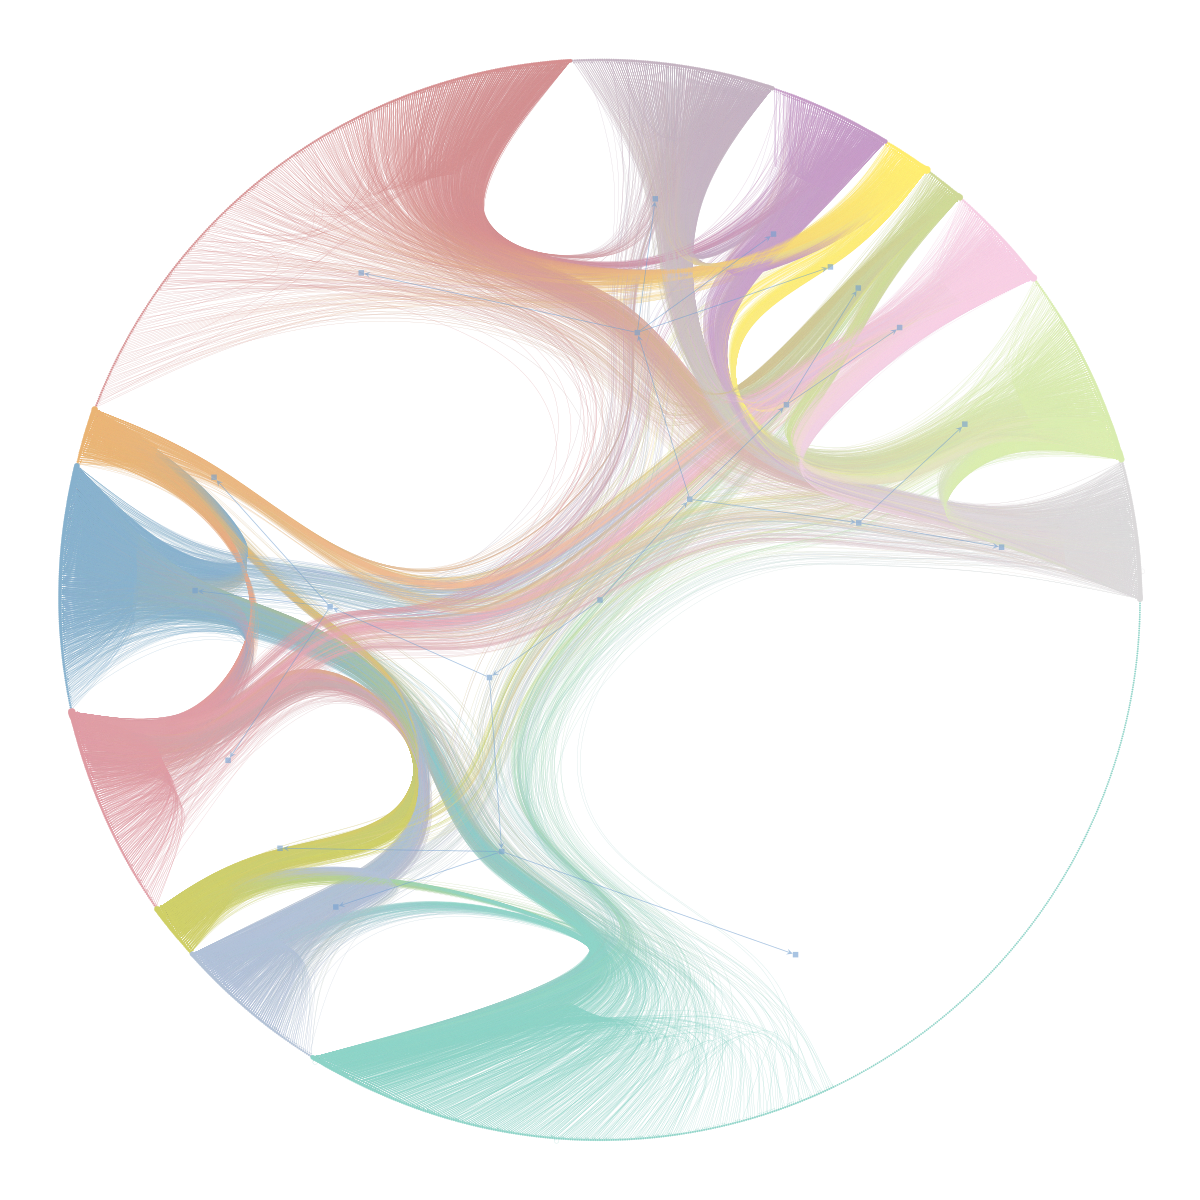

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f92e779b040, at 0x7f92e7679b20>,
 <Graph object, directed, with 1512 vertices and 1511 edges, at 0x7f92e77d4430>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f92e77d4430, at 0x7f92e7679280>)

In [7]:
g = gt.collection.data["polblogs"]
state = gt.minimize_nested_blockmodel_dl(g)
state.draw()

In [8]:
state.print_summary()

l: 0, N: 1490, B: 14
l: 1, N: 14, B: 5
l: 2, N: 5, B: 2
l: 3, N: 2, B: 1


In [9]:
levels = state.get_levels()
for s in levels:
    print(s)

<BlockState object with 14 blocks (14 nonempty), degree-corrected, for graph <Graph object, directed, with 1490 vertices and 19090 edges, 4 internal vertex properties, 2 internal graph properties, at 0x7f92e779b040>, at 0x7f92e762d130>
<BlockState object with 5 blocks (5 nonempty), for graph <Graph object, directed, with 14 vertices and 178 edges, 2 internal vertex properties, 1 internal edge property, at 0x7f92e762da90>, at 0x7f92e768c9a0>
<BlockState object with 2 blocks (2 nonempty), for graph <Graph object, directed, with 5 vertices and 25 edges, 2 internal vertex properties, 1 internal edge property, at 0x7f92e768cbb0>, at 0x7f92e767d130>
<BlockState object with 1 blocks (1 nonempty), for graph <Graph object, directed, with 2 vertices and 4 edges, 2 internal vertex properties, 1 internal edge property, at 0x7f92e767d460>, at 0x7f92e769d460>


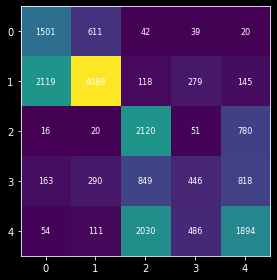

In [10]:
e = levels[1].get_matrix().todense()
fig, ax = plt.subplots()
im=ax.imshow(e)
n=levels[1].get_B()
for i in range(n):
    for j in range(n):
        text = ax.text(j, i, int(e[i, j]),
                       ha="center", va="center", color="w", size="8")
fig.tight_layout()

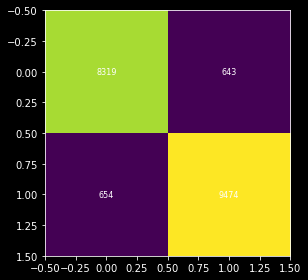

In [11]:
e = levels[2].get_matrix().todense()
fig, ax = plt.subplots()
im=ax.imshow(e)
n=levels[2].get_B()
for i in range(n):
    for j in range(n):
        text = ax.text(j, i, int(e[i, j]),
                       ha="center", va="center", color="w", size="8")
fig.tight_layout()

### Q3:How many levels are there in your model? How many blocks are there in each level?

In [12]:
print(f"Num of levels: {len(levels)}")
for i, s in enumerate(levels): print(f"Level {i}: {s.get_B()} Block(s)")

Num of levels: 4
Level 0: 14 Block(s)
Level 1: 5 Block(s)
Level 2: 2 Block(s)
Level 3: 1 Block(s)


### Q4:From the heat maps of two levels, which blocks are assortative? Which are disassortative?

Assortative blocks: \[0,0\] \[1,1\]

Idsassortative blocks: \[0,1\] \[1,0\]